In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
df=pd.read_csv('international_matches.csv')
df1=pd.read_csv('FIFA - 2022.csv')

# Describing the data

In [62]:
#df.head().T
df.describe().T

,count,mean,std,min,25%,50%,75%,max
home_team_fifa_rank,23921.0,77.854688,52.355225,1.0,33.0,71.0,115.0,211.0
away_team_fifa_rank,23921.0,80.797375,53.232902,1.0,36.0,73.0,119.0,211.0
home_team_total_fifa_points,23921.0,323.401488,500.825725,0.0,0.0,0.0,547.0,2164.0
away_team_total_fifa_points,23921.0,315.453576,490.944273,0.0,0.0,0.0,523.0,2164.0
home_team_score,23921.0,1.609214,1.630127,0.0,0.0,1.0,2.0,31.0
away_team_score,23921.0,1.068266,1.263944,0.0,0.0,1.0,2.0,21.0
home_team_goalkeeper_score,8379.0,74.963838,8.212242,47.0,70.0,75.0,81.0,97.0
away_team_goalkeeper_score,8095.0,74.212477,8.225919,47.0,69.0,74.0,80.0,97.0
home_team_mean_defense_score,7787.0,74.903249,6.003114,52.8,71.0,75.2,78.8,91.8
home_team_mean_offense_score,8510.0,75.818743,6.268416,53.3,71.7,75.7,80.0,93.0


1. Fifa countries

In [3]:
nigg= df[['home_team']]
nigg=df[['home_team']].rename(columns={'home_team':'team'})
balls=df[['away_team']]
balls=df[['away_team']].rename(columns={'away_team':'team'})

niggballs=nigg.append(balls)
niggballs=niggballs[['team']].drop_duplicates()
wc_total=niggballs['team'].to_list()

wc_2022=df1['Team'].tolist()
print(wc_2022)

['Argentina', 'France', 'Croatia', 'Morocco', 'England', 'Netherlands', 'Portugal', 'Brazil', 'Japan', 'Senegal', 'Australia', 'Switzerland', 'USA', 'Spain', 'Poland', 'South Korea', 'Germany', 'Ecuador', 'Cameroon', 'Uruguay', 'Tunisia', 'Mexico', 'Belgium', 'Ghana', 'Saudi Arabia', 'Iran', 'Costa Rica', 'Denmark', 'Serbia', 'Wales', 'Canada', 'Qatar']


C:\Users\ankur\AppData\Local\Temp\ipykernel_26572\841423267.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  niggballs=nigg.append(balls)


2. Fifa rankings

In [4]:
home=df[['date','home_team','home_team_fifa_rank','home_team_total_fifa_points','home_team_score']]
away=df[['date','away_team','away_team_fifa_rank','away_team_total_fifa_points','away_team_score']]
home=home.rename(columns={'home_team':'team','home_team_fifa_rank':'rank','home_team_total_fifa_points':'total fifa points','home_team_score':'team_score'})
away=away.rename(columns={'away_team':'team','away_team_fifa_rank':'rank','away_team_total_fifa_points':'total fifa points','away_team_score':'team_score'})
fifarank=home.append(away)

fifarank=fifarank.sort_values(['team','date'],ascending=[True,False])
fifarank['row_number']=fifarank.groupby('team').cumcount()+1
fifatop=fifarank[fifarank['row_number']==1].drop('row_number',axis=1).nsmallest(10,'rank')
fifatop[['team','rank','total fifa points']]

C:\Users\ankur\AppData\Local\Temp\ipykernel_26572\1032665697.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fifarank=home.append(away)


,team,rank,total fifa points
23760,Brazil,1,1832
23909,Belgium,2,1827
23885,France,3,1789
23741,Argentina,4,1765
23906,England,5,1761
23907,Italy,6,1723
23866,Spain,7,1709
23867,Portugal,8,1674
23903,Mexico,9,1658
23908,Netherlands,10,1658


3. Advantage over home matches

In [63]:
hometeam=df[['country','home_team_score','away_team_score']]
#home_team['home_team_score']>home_team['away_team_score']
home_wins=hometeam.loc[hometeam['home_team_score']>hometeam['away_team_score']]

home_wins=home_wins.rename(columns={'home_team_score':'goals_scored','away_team_score':'goals_conceded'})
home_wins

home_loss=hometeam.loc[hometeam['home_team_score']<hometeam['away_team_score']]
home_loss=home_loss.rename(columns={'home_team_score':'goals_scored','away_team_score':'goals_conceded'})
home_loss

home_advantage=home_wins.append(home_loss)
home_advantage

x=home_advantage.mean()
print(x)

goals_scored      1.854837
goals_conceded    1.144394
dtype: float64


C:\Users\ankur\AppData\Local\Temp\ipykernel_26572\2781291216.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  home_advantage=home_wins.append(home_loss)
C:\Users\ankur\AppData\Local\Temp\ipykernel_26572\2781291216.py:15: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  x=home_advantage.mean()


4. Piechart of homeadvantage

C:\Users\ankur\AppData\Local\Temp\ipykernel_26572\1442176457.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  x = home_advantage.mean()


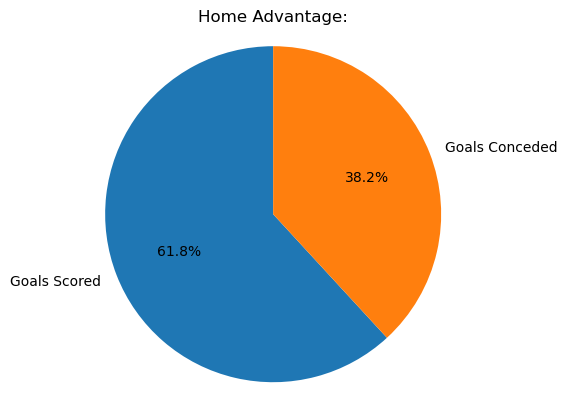

In [67]:
# Calculate the mean goals scored and conceded
x = home_advantage.mean()
labels = ['Goals Scored', 'Goals Conceded']
sizes = [x['goals_scored'], x['goals_conceded']]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title("Home Advantage:")
plt.show()

# Analysing the data (logical factor based)

1. Most wins

In [10]:
hometeam=df[['date','home_team','home_team_score','away_team_score']]

hometeam['home_team_score']>hometeam['away_team_score']
home_wins=hometeam.loc[hometeam['home_team_score']>hometeam['away_team_score']]

home_loss.head()
home_loss.head()

hometeam_wins=home_wins[['date','home_team','home_team_score','away_team_score']].rename(columns={'home_team':'team','home_team_score':'Home_team_win','away_team_score':'away_team_win'})
awayteam_wins=home_loss[['date','home_team','home_team_score','away_team_score']].rename(columns={'home_team':'team','home_team_score':'Home_team_win','away_team_score':'away_team_win'})

Team_streak=hometeam_wins.append(awayteam_wins)
Team_streak

Team_streak['team'].value_counts().nlargest(10)

C:\Users\ankur\AppData\Local\Temp\ipykernel_26572\942943432.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Team_streak=hometeam_wins.append(awayteam_wins)


USA                     253
Mexico                  243
Saudi Arabia            219
Japan                   211
Brazil                  195
Egypt                   195
Qatar                   187
Korea Republic          186
United Arab Emirates    182
Oman                    179
Name: team, dtype: int64

2. Most loss

In [11]:
hometeam['home_team_score']<hometeam['away_team_score']
home_loss=hometeam.loc[hometeam['home_team_score']<hometeam['away_team_score']]

hometeam_loss=home_loss[['date','home_team','home_team_score','away_team_score']].rename(columns={'home_team':'team','home_team_score':'Home_team_win','away_team_score':'away_team_win'})
awayteam_loss=home_loss[['date','home_team','home_team_score','away_team_score']].rename(columns={'home_team':'team','home_team_score':'Home_team_win','away_team_score':'away_team_win'})

Team_streak=hometeam_loss.append(awayteam_loss)
Team_streak

Team_streak['team'].value_counts().nlargest(10)

C:\Users\ankur\AppData\Local\Temp\ipykernel_26572\1690756477.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Team_streak=hometeam_loss.append(awayteam_loss)


Malta                   190
Luxembourg              190
San Marino              166
Estonia                 156
Andorra                 146
Liechtenstein           146
Latvia                  128
Qatar                   128
El Salvador             128
United Arab Emirates    126
Name: team, dtype: int64

3(a). Winning % when higher rank team faces lower rank team 

   (rank based analysation)

In [13]:
def victory(team1,team2,team1_rank,team2_rank,team1_score,team2_score):
    if team1_score > team2_score:
        winner = team1
    elif team1_score == team2_score:
        winner = 'Drawn'
    else:
        winner = team2
    return winner 

#winner counts
df['winner']=df.apply(lambda x: victory(x['home_team'],x['away_team'],x['home_team_fifa_rank'],x['away_team_fifa_rank'],x['home_team_score'],x['away_team_score']),axis=1)


In [16]:
def rank(home,away,rank_home,rank_away):
    if rank_home<rank_away:
        return home
    else:
        return away  

#better rank counts    
df['better_rank']=df.apply(lambda x:rank(x['home_team'],x['away_team'],x['home_team_fifa_rank'],x['away_team_fifa_rank']),axis=1)
    

In [32]:
def result_rank(winner,better_rank):
    if winner =='Drawn':
        return winner
    if winner == better_rank:
        return 'Higher rank team'
    else:
        return 'Lower rank team'

#counts of the result better rank & winner    
df['result_rank']=df.apply(lambda x: result_rank(x['winner'],x['better_rank']),axis=1)    

3(b). Countplot for result rank

<function matplotlib.pyplot.show(close=None, block=None)>

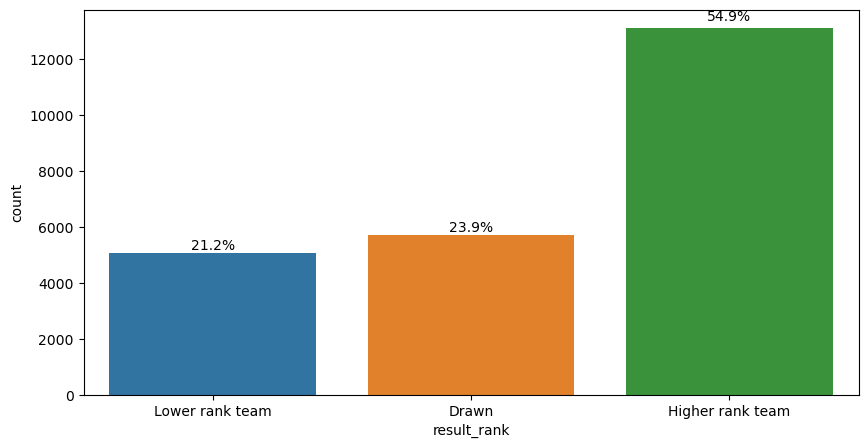

In [33]:
plt.figure(figsize=(10,5))
total=float(len(df))
ax=sns.countplot(x='result_rank',data=df)
for p in ax.patches:
    percentage='{:.1f}%'.format(100*p.get_height()/total)
    width=p.get_width()
    height=p.get_height()
    x,y=p.get_xy()
    ax.annotate(percentage,(x+width/2,y+height*1.02),ha='center')
plt.show    

4(a). winning % when heigher offense rank team faces lower offense rank team

   (rank based analysis)

In [35]:
#attack score home team
df_rank_attack=df[df['home_team_mean_offense_score'].notnull()]
#attack score away team
df_rank_attack=df[df['away_team_mean_offense_score'].notnull()]

def rank_attack(home,away,rank_home,rank_away):
    if rank_home>rank_away:
        return home
    else:
        return away

#storing teams with better attack score    
df_rank_attack['better_attack']=df.apply(lambda x:rank_attack(x['home_team'],x['away_team'],x['home_team_mean_offense_score'],x['away_team_mean_offense_score']),axis=1)
#storing teams with better result only attack based
df_rank_attack['result_attack']=df_rank_attack.apply(lambda x:result_rank(x['winner'],x['better_attack']),axis=1)    

C:\Users\ankur\AppData\Local\Temp\ipykernel_26572\2802188736.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rank_attack['better_attack']=df.apply(lambda x:rank_attack(x['home_team'],x['away_team'],x['home_team_mean_offense_score'],x['away_team_mean_offense_score']),axis=1)
C:\Users\ankur\AppData\Local\Temp\ipykernel_26572\2802188736.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rank_attack['result_attack']=df_rank_attack.apply(lambda x:result_rank(x['winner'],x['better_attack']),axis=1)


4(b). countplot for attack rank 

   (based on attack conclusion (i.e.attack score + attack result )

<function matplotlib.pyplot.show(close=None, block=None)>

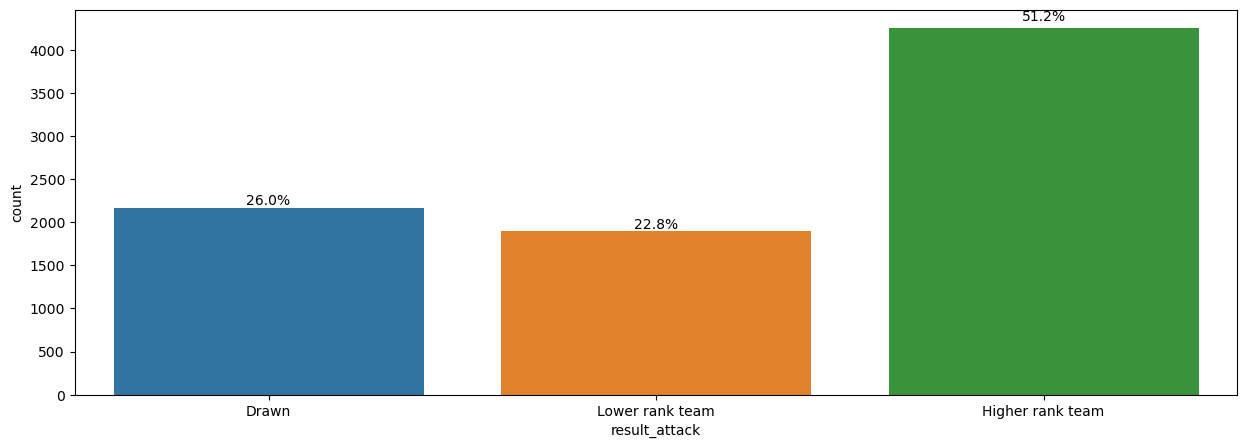

In [70]:
plt.figure(figsize=(15,5))
total=float(len(df_rank_attack))
ax=sns.countplot(x='result_attack',data=df_rank_attack)
for p in ax.patches:
    percentage='{:.1f}%'.format(100*p.get_height()/total)
    width=p.get_width()
    height=p.get_height()
    x,y=p.get_xy()
    ax.annotate(percentage,(x+width/2,y+height*1.02),ha='center')
plt.show    

5(a). Result whether strong attack team score more & team with strong defence cociede less

In [40]:
#calculating offence score of all teams
#(priority based on offence score)
offense_score=[]

for x in wc_2022:
    of_score=np.round(df[df['home_team']==x]['home_team_mean_offense_score'].mean()+df[df['away_team']==x]['away_team_mean_offense_score'].mean()/2)
    offense_score.append(of_score)
offense_score=pd.DataFrame({'Team':wc_2022,'Offense Score':offense_score}).sort_values('Offense Score',ascending=False).reset_index(drop=True)
offense_score.index +=1
offense_score


#calculating goal difference(GD), goal ratio(GR) of all teams
#(prioriy based on the overall GD,GR scores)
goals_scored_home, goals_scored_away = [], []
goals_conceded_home, goals_conceded_away = [], []
total_goals_scored, total_goals_conceded = [], []

for team in wc_2022:
    gch = df[df['home_team'] == team]['away_team_score'].sum()
    gsh = df[df['home_team'] == team]['home_team_score'].sum()
    gca = df[df['away_team'] == team]['home_team_score'].sum()
    gsa = df[df['away_team'] == team]['away_team_score'].sum()

    tgc = gch + gca
    tgs = gsh + gsa

    goals_conceded_home.append(gch)
    goals_scored_home.append(gsh)
    goals_conceded_away.append(gca)
    goals_scored_away.append(gsa)

    total_goals_scored.append(tgs)
    total_goals_conceded.append(tgc)

goals = pd.DataFrame({
    'Team': wc_2022,
    'Scored goals home': goals_scored_home,
    'Scored goals away': goals_scored_away,
    'Conceded goals home': goals_conceded_home,
    'Conceded goals away': goals_conceded_away,
    'Total scored goals': total_goals_scored,
    'Total conceded goals': total_goals_conceded
})

goals['Goal difference'] = goals['Total scored goals'] - goals['Total conceded goals']
goals['Goal ratio'] = goals['Total scored goals'] / goals['Total conceded goals']

goals = goals.sort_values('Goal difference', ascending=False).reset_index(drop=True)
goals.index += 1

goals


#comparing both offense score vs GD,GR and storing based on priority of both scores
#it is comparing values if a higher offence team scores more goals against other teams
offense_players_vs_goals_scored = offense_score.merge(goals, on='Team')[['Team', 'Offense Score', 'Total scored goals']]
offense_players_vs_goals_scored['Total scored goals/offense score'] = offense_players_vs_goals_scored['Total scored goals'] / offense_players_vs_goals_scored['Offense Score']
offense_players_vs_goals_scored = offense_players_vs_goals_scored.sort_values('Total scored goals/offense score')
offense_players_vs_goals_scored.index += 1
offense_players_vs_goals_scored=offense_players_vs_goals_scored.sort_index(ascending=True)
offense_players_vs_goals_scored

,Team,Offense Score,Total scored goals,Total scored goals/offense score
1,Argentina,132.0,657,4.977273
2,Brazil,130.0,954,7.338462
3,Spain,129.0,781,6.054264
4,France,129.0,670,5.193798
5,England,128.0,630,4.921875
6,Netherlands,128.0,700,5.468750
7,Portugal,127.0,668,5.259843
8,Uruguay,125.0,504,4.032000
9,Germany,125.0,875,7.000000
10,Belgium,123.0,563,4.577236


5(b). plotting 

Text(0.5, 1.0, 'top 10 best team goals/offence ratio')

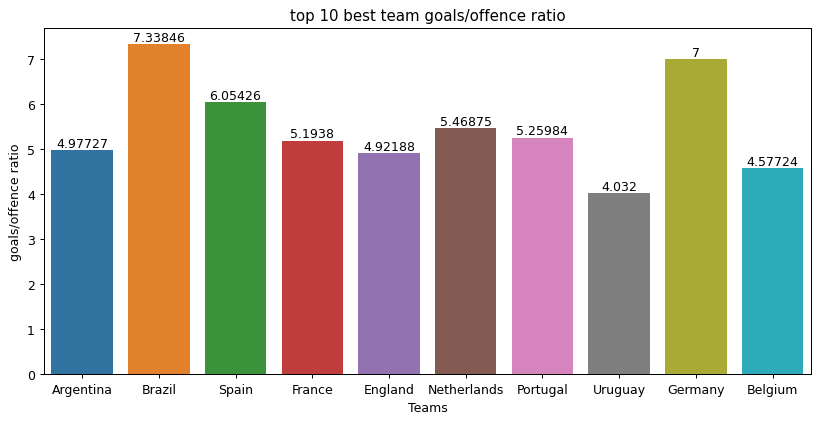

In [71]:
plt.figure(figsize=(11,5),dpi=90)
ax=sns.barplot(data=offense_players_vs_goals_scored[:10],x='Team',y='Total scored goals/offense score')
ax.bar_label(ax.containers[0])
plt.xlabel('Teams')
plt.ylabel('goals/offence ratio')
plt.title('top 10 best team goals/offence ratio')

6(a). better team win percentage in home team, away team

In [44]:
home_team_better_rank=df[(df['home_team_fifa_rank']<df['away_team_fifa_rank'])]['home_team_result'].value_counts()
home_team_better_rank

away_team_better_rank=df[(df['home_team_fifa_rank']>df['away_team_fifa_rank'])]['home_team_result'].value_counts()
away_team_better_rank

# Calculate win percentages
away_team_better_rank_wins_percent = np.round(100 * away_team_better_rank['Win'] / away_team_better_rank.sum())
home_team_better_rank_wins_percent = np.round(100 * home_team_better_rank['Win'] / home_team_better_rank.sum())
total_team_better_rank_win_percent = np.round(100 * (away_team_better_rank['Win'] + home_team_better_rank['Win']) / (away_team_better_rank.sum() + home_team_better_rank.sum()))

data = {'win percentage': [home_team_better_rank_wins_percent, away_team_better_rank_wins_percent, total_team_better_rank_win_percent]}
better_team_win_percent = pd.DataFrame(data, index=['home', 'away', 'total'])
better_team_win_percent

,win percentage
home,66.0
away,30.0
total,49.0


6(b). plotting 

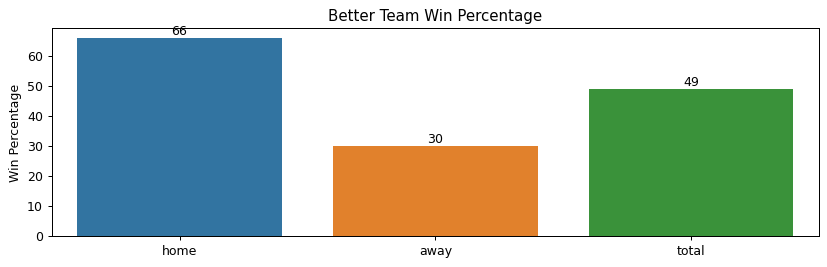

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(11, 3), dpi=90)
ax = sns.barplot(data=better_team_win_percent, x=better_team_win_percent.index, y='win percentage')  # Correct column name
sns.barplot(data=better_team_win_percent, x=better_team_win_percent.index, y='win percentage')  # Correct column name
ax.bar_label(ax.containers[0], label_type='edge')  # Label the bars on the top edge
plt.ylabel('Win Percentage')
plt.title('Better Team Win Percentage')
plt.show()

# Analysing the data (statistical factor based)

1. teams with best defense, midfield, offense and gk

In [ ]:
ranks = []
for x in wc_2022:
    rank_df = df[(df['home_team'] == x) | (df['away_team'] == x)].sort_values(['date', 'home_team_fifa_rank', 'away_team_fifa_rank'])
    if (rank_df['home_team'] == x).any():
        rank = rank_df.loc[rank_df['home_team'] == x, 'home_team_fifa_rank'].values[0]
    elif (rank_df['away_team'] == x).any():
        rank = rank_df.loc[rank_df['away_team'] == x, 'away_team_fifa_rank'].values[0]
    else:
        rank = None
    ranks.append(rank)

team_ranks = pd.DataFrame({'Team': wc_2022, 'Rank': ranks}).sort_values('Rank').reset_index(drop=True)
team_ranks['Rank'] = team_ranks.index + 1  # Assign consecutive integer ranks
team_ranks


1(a). teams with best gk

In [ ]:
goalkeeper_scores = []

for x in wc_2022:
    avg_gk_score = (df[df['away_team'] == x]['away_team_goalkeeper_score'].mean() + df[df['home_team'] == x]['home_team_goalkeeper_score'].mean()) / 2
    gk_score = np.round(avg_gk_score)
    goalkeeper_scores.append(gk_score)
    
goalkeeper_scores = pd.DataFrame({'Team': wc_2022, 'GK score': goalkeeper_scores}).sort_values('GK score', ascending=False).reset_index(drop=True)
goalkeeper_scores.index += 1  # Assign consecutive integer ranks
goalkeeper_scores

plotting gk based

In [ ]:
plt.figure(figsize=(11, 7), dpi=90)
ax = sns.barplot(data=goalkeeper_scores[:10], x='Team', y='GK score')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points')

plt.xlabel('Team')
plt.ylabel('Score')
plt.title('Top 10 strongest Goalkeeping')
plt.tight_layout()
plt.show()


1(b). teams with best defense 

In [ ]:
defense_scores = []

for x in wc_2022:
    df_score = (df[df['home_team'] == x]['home_team_mean_defense_score'].mean() + df[df['away_team'] == x]['away_team_mean_defense_score'].mean()) / 2
    df_score = np.round(df_score)
    defense_scores.append(df_score)
    
defense_scores_df = pd.DataFrame({'Team': wc_2022, 'Defense Score': defense_scores}).sort_values('Defense Score', ascending=False).reset_index(drop=True)
defense_scores_df.index += 1  # Assign consecutive integer ranks
defense_scores_df

plotting defense

In [ ]:
plt.figure(figsize=(11, 7), dpi=90)
ax = sns.barplot(data=defense_scores_df[:10], x='Team', y='Defense Score')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points')

plt.xlabel('Team')
plt.ylabel('Score')
plt.title('Top 10 Strongest Defense')
plt.tight_layout()
plt.show()

1(c). teams with best offense 

In [ ]:
attack_scores = []

for x in wc_2022:
    attack_score = (df[df['home_team'] == x]['home_team_mean_offense_score'].mean() + df[df['away_team'] == x]['away_team_mean_offense_score'].mean()) / 2
    attack_score = np.round(attack_score)
    attack_scores.append(attack_score)
    
attack_scores_df = pd.DataFrame({'Team': wc_2022, 'Attack Score': attack_scores}).sort_values('Attack Score', ascending=False).reset_index(drop=True)
attack_scores_df.index += 1  # Assign consecutive integer ranks
attack_scores_df

plotting offense

In [ ]:
plt.figure(figsize=(11, 7), dpi=90)
ax = sns.barplot(data=attack_scores_df[:10], x='Team', y='Attack Score')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points')

plt.xlabel('Team')
plt.ylabel('Score')
plt.title('Top 10 Strongest Attack')
plt.tight_layout()
plt.show()

1(d). teams with best midfield

In [ ]:
midfield_scores = []

for x in wc_2022:
    midfield_score = (df[df['home_team'] == x]['home_team_mean_midfield_score'].mean() + df[df['away_team'] == x]['away_team_mean_midfield_score'].mean()) / 2
    midfield_score = np.round(midfield_score)
    midfield_scores.append(midfield_score)
    
midfield_scores_df = pd.DataFrame({'Team': wc_2022, 'Midfield Score': midfield_scores}).sort_values('Midfield Score', ascending=False).reset_index(drop=True)
midfield_scores_df.index += 1  # Assign consecutive integer ranks
midfield_scores_df

plotting midfield

In [ ]:
plt.figure(figsize=(11, 7), dpi=90)
ax = sns.barplot(data=midfield_scores_df[:10], x='Team', y='Midfield Score')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points')

plt.xlabel('Team')
plt.ylabel('Score')
plt.title('Top 10 Strongest Midfield')  # Adjust the title for midfield
plt.tight_layout()
plt.show()

2. Win percentage

In [ ]:
wc2022_teams = wc_2022

hwins, hdraws, hloses = [], [], []
awins, adraws, aloses = [], [], []

for team in wc2022_teams:
    home_win = df[(df["home_team"] == team) & (df["home_team_result"] == "Win")].shape[0]
    home_draw = df[(df["home_team"] == team) & (df["home_team_result"] == "Draw")].shape[0]
    home_lose = df[(df["home_team"] == team) & (df["home_team_result"] == "Lose")].shape[0]
    
    away_win = df[(df["away_team"] == team) & (df["home_team_result"] == "Lose")].shape[0]
    away_draw = df[(df["away_team"] == team) & (df["home_team_result"] == "Draw")].shape[0]
    away_lose = df[(df["away_team"] == team) & (df["home_team_result"] == "Win")].shape[0]
    
    hwins.append(home_win)
    hdraws.append(home_draw)
    hloses.append(home_lose)
    awins.append(away_win)
    adraws.append(away_draw)
    aloses.append(away_lose)

total_wins = np.add(hwins, awins)
total_draws = np.add(hdraws, adraws)
total_losses = np.add(hloses, aloses)
total_matches = np.add(np.add(total_wins, total_draws), total_losses)

win_percentages = (total_wins / total_matches) * 100

team_win_percentage = pd.DataFrame({'Team': wc2022_teams, 'Win Percentage': win_percentages})
team_win_percentage = team_win_percentage.sort_values('Win Percentage', ascending=False).reset_index(drop=True)
team_win_percentage.index += 1

print(team_win_percentage)


# Predictor (statistical analysis)

In [50]:
# Calculate statistics for each team
teams = df['home_team'].unique()
team_stats = []

for team in teams:
    total_matches = len(df[(df['home_team'] == team) | (df['away_team'] == team)])
    total_wins = len(df[(df['home_team'] == team) & (df['home_team_result'] == 'Win')]) + len(df[(df['away_team'] == team) & (df['home_team_result'] == 'Lose')])
    total_draws = len(df[(df['home_team'] == team) & (df['home_team_result'] == 'Draw')]) + len(df[(df['away_team'] == team) & (df['home_team_result'] == 'Draw')])
    total_losses = total_matches - total_wins - total_draws
    
    home_wins = len(df[(df['home_team'] == team) & (df['home_team_result'] == 'Win')])
    home_draws = len(df[(df['home_team'] == team) & (df['home_team_result'] == 'Draw')])
    home_losses = len(df[(df['home_team'] == team) & (df['home_team_result'] == 'Lose')])
    
    away_wins = len(df[(df['away_team'] == team) & (df['home_team_result'] == 'Lose')])
    away_draws = len(df[(df['away_team'] == team) & (df['home_team_result'] == 'Draw')])
    away_losses = len(df[(df['away_team'] == team) & (df['home_team_result'] == 'Win')])
    
    win_percentage = (total_wins / total_matches) * 100 if total_matches > 0 else 0
    draw_percentage = (total_draws / total_matches) * 100 if total_matches > 0 else 0
    loss_percentage = (total_losses / total_matches) * 100 if total_matches > 0 else 0
    
    home_win_percentage = (home_wins / (home_wins + home_draws + home_losses)) * 100 if (home_wins + home_draws + home_losses) > 0 else 0
    home_draw_percentage = (home_draws / (home_wins + home_draws + home_losses)) * 100 if (home_wins + home_draws + home_losses) > 0 else 0
    home_loss_percentage = (home_losses / (home_wins + home_draws + home_losses)) * 100 if (home_wins + home_draws + home_losses) > 0 else 0
    
    away_win_percentage = (away_wins / (away_wins + away_draws + away_losses)) * 100 if (away_wins + away_draws + away_losses) > 0 else 0
    away_draw_percentage = (away_draws / (away_wins + away_draws + away_losses)) * 100 if (away_wins + away_draws + away_losses) > 0 else 0
    away_loss_percentage = (away_losses / (away_wins + away_draws + away_losses)) * 100 if (away_wins + away_draws + away_losses) > 0 else 0

    # Calculate average rank, rank difference, point difference, and won previous matches
    avg_rank = (df[df['home_team'] == team]['home_team_fifa_rank'].mean() + df[df['away_team'] == team]['away_team_fifa_rank'].mean()) / 2
    rank_diff = df[df['home_team'] == team]['home_team_fifa_rank'].mean() - df[df['away_team'] == team]['away_team_fifa_rank'].mean()
    point_diff = df[df['home_team'] == team]['home_team_total_fifa_points'].mean() - df[df['away_team'] == team]['away_team_total_fifa_points'].mean()
    won_previous_matches = len(df[(df['home_team'] == team) & (df['home_team_result'] == 'Win')]) + len(df[(df['away_team'] == team) & (df['home_team_result'] == 'Win')])
    
    team_stats.append([team, total_matches, total_wins, total_draws, total_losses, home_wins, home_draws, home_losses, away_wins, away_draws, away_losses, win_percentage, draw_percentage, loss_percentage, home_win_percentage, home_draw_percentage, home_loss_percentage, away_win_percentage, away_draw_percentage, away_loss_percentage, avg_rank, rank_diff, point_diff, won_previous_matches])

# Create DataFrame
columns = ['Team', 'Total', 'Win', 'Draw', 'Lose', 'Home Win', 'Home Draw', 'Home Lose', 'Away Win', 'Away Draw', 'Away Lose', 'Win %', 'Draw %', 'Lose %', 'Home Win %', 'Home Draw %', 'Home Loss %', 'Away Win %', 'Away Draw %', 'Away Loss %', 'avg_rank', 'rank_diff', 'point_diff', 'won_previous_matches']
team_stats_df = pd.DataFrame(team_stats, columns=columns)
# Display the DataFrame
# Filter the team_stats_df DataFrame
filtered_team_stats_df = team_stats_df

# Display the filtered DataFrame
filtered_team_stats_df

sorted_team_stats_df = filtered_team_stats_df.sort_values(by='Win %', ascending=False)

# Reset the index of the sorted DataFrame and add 1 to each index value
sorted_team_stats_df.reset_index(drop=True, inplace=True)
sorted_team_stats_df.index = sorted_team_stats_df.index + 1

# Display the sorted and indexed DataFrame
sorted_team_stats_df

,Team,Total,Win,Draw,Lose,Home Win,Home Draw,Home Lose,Away Win,Away Draw,...,Home Win %,Home Draw %,Home Loss %,Away Win %,Away Draw %,Away Loss %,avg_rank,rank_diff,point_diff,won_previous_matches
1,Brazil,433,301,76,56,181,31,21,120,45,...,77.682403,13.304721,9.012876,60.000000,22.500000,17.500000,3.119614,0.679227,127.101738,216
2,Spain,354,246,64,44,145,27,17,101,37,...,76.719577,14.285714,8.994709,61.212121,22.424242,16.363636,5.421934,-0.113709,-35.715248,172
3,France,370,230,83,57,145,44,32,85,39,...,65.610860,19.909502,14.479638,57.046980,26.174497,16.778523,8.269140,-0.293935,23.564001,170
4,Germany,390,240,82,68,139,44,36,101,38,...,63.470320,20.091324,16.438356,59.064327,22.222222,18.713450,6.406994,1.094689,53.204278,171
5,IR Iran,366,217,79,70,133,31,27,84,48,...,69.633508,16.230366,14.136126,48.000000,27.428571,24.571429,45.127435,-2.705131,-1.019417,176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,Liechtenstein,213,15,26,172,9,16,73,6,10,...,9.183673,16.326531,74.489796,5.217391,8.695652,86.086957,156.265484,-1.347294,-24.420053,108
208,Andorra,189,11,22,156,10,13,74,1,9,...,10.309278,13.402062,76.288660,1.086957,9.782609,89.130435,165.953216,-0.463133,46.546952,92
209,Djibouti,78,4,5,69,4,4,27,0,1,...,11.428571,11.428571,77.142857,0.000000,2.325581,97.674419,193.248505,-0.154153,38.782060,46
210,Anguilla,41,2,5,34,1,2,10,1,3,...,7.692308,15.384615,76.923077,3.571429,10.714286,85.714286,203.222527,2.016484,25.695055,25


plotting 

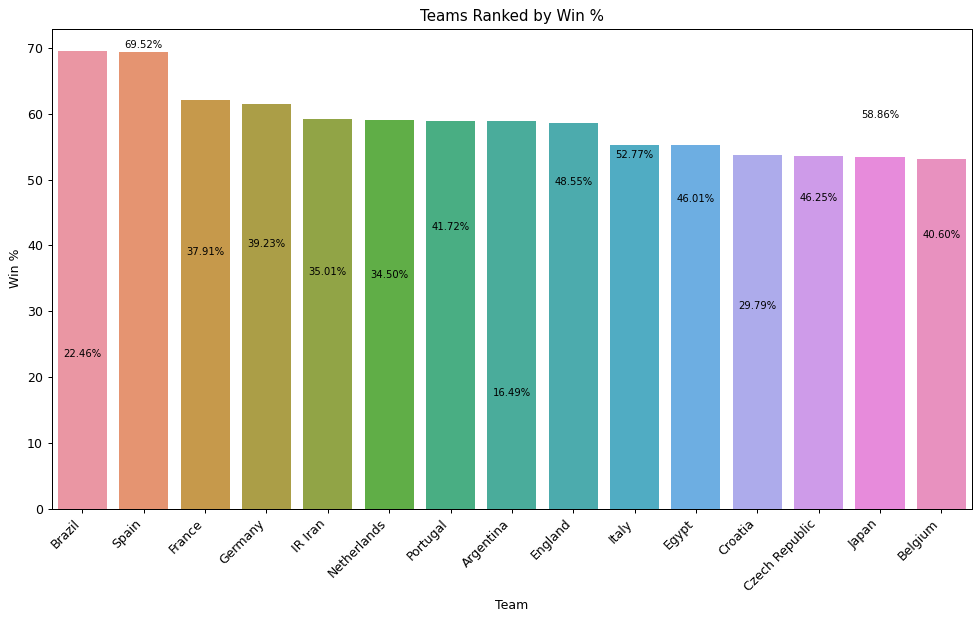

In [51]:
# Sort the DataFrame by "Win %" column in descending order
sorted_team_stats = team_stats_df.sort_values(by='Win %', ascending=False)

# Create the bar plot
plt.figure(figsize=(11, 7), dpi=90)
ax = sns.barplot(data=sorted_team_stats[:15], x='Team', y='Win %')
plt.xlabel("Team")
plt.ylabel('Win %')
plt.title('Teams Ranked by Win %')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Annotate all the bars with their corresponding percentage values
for index, row in sorted_team_stats.iterrows():
    ax.annotate(f'{row["Win %"]:.2f}%', 
                xy=(index, row["Win %"]), 
                xytext=(0, 3), 
                textcoords='offset points', 
                ha='center', 
                fontsize=8, 
                color='black')

plt.tight_layout()
plt.show()

# Predictor (visual analysis)

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create feature matrix X and target variable y
X = df[['avg_rank', 'rank_diff', 'point_diff', 'won_previous_matches']]
y = df['home_team_result']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_poly_train, y_train)

# Predict on the test set
y_pred = model.predict(X_poly_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Predict the World Cup winner
world_cup_teams = [
    {'avg_rank': avg_rank, 'rank_diff': rank_diff,
     'point_diff': point_diff, 'won_previous_matches': won_previous_matches}
    # Repeat this for all World Cup teams you want to predict
]
world_cup_features = pd.DataFrame(world_cup_teams)
world_cup_features_poly = poly.transform(world_cup_features)

# Assuming you have trained your logistic regression model and stored it in the 'model' variable
# Predict the class indices for the World Cup teams
world_cup_class_indices = model.predict(world_cup_features_poly)

# Make sure the 'world_cup_class_indices' array has the same length as the number of rows in the DataFrame
if len(world_cup_class_indices) == len(df):
    # Find the team(s) with the predicted winner's class index (class 1 for 'Win')
    predicted_winner_teams = df.loc[world_cup_class_indices == 1, 'home_team'].tolist()

    # Display the predicted World Cup Winner(s)
    print(f"Predicted World Cup Winner(s): {', '.join(predicted_winner_teams)}")
else:
    print("Error: Length mismatch between prediction indices and DataFrame rows.")


KeyError: "None of [Index(['avg_rank', 'rank_diff', 'point_diff', 'won_previous_matches'], dtype='object')] are in the [columns]"

In [ ]:
## import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Calculate average rank and rank difference
df['avg_rank'] = (df['home_team_fifa_rank'] + df['away_team_fifa_rank']) / 2
df['rank_diff'] = df['home_team_fifa_rank'] - df['away_team_fifa_rank']

# Calculate point difference
df['point_diff'] = df['home_team_total_fifa_points'] - df['away_team_total_fifa_points']

# Whether a team has won or not
df['won_previous_matches'] = df['home_team_result'] == 'Win'


X = df[['avg_rank', 'rank_diff', 'point_diff', 'won_previous_matches']]
y = df['home_team_result']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train a Logistic Regression model
model = LogisticRegression(max_iter=2000, random_state=42)  # Increased max_iter to avoid convergence warning
model.fit(X_train_poly, y_train)

# ... (code to calculate team statistics)

# Predict the World Cup winner
world_cup_teams = [
    {'avg_rank': avg_rank, 'rank_diff': rank_diff,
     'point_diff': point_diff, 'won_previous_matches': won_previous_matches, 'Team': team}
    # Repeat this for all World Cup teams you want to predict
]

# Create a DataFrame from the world_cup_teams list
world_cup_features = pd.DataFrame(world_cup_teams)

# Exclude the 'Team' column before applying polynomial features
world_cup_features_poly = poly.transform(world_cup_features.drop('Team', axis=1))

# Use the model to predict probabilities
world_cup_probabilities = model.predict_proba(world_cup_features_poly)

# Find the team(s) with the highest predicted probability of winning
predicted_winner_indices = np.where(world_cup_probabilities[:, 1] == world_cup_probabilities[:, 1].max())[0]

if len(predicted_winner_indices) == 0:
    print("No predicted winner.")
else:
    print("Predicted World Cup winner(s):")
    for index in predicted_winner_indices:
        print(world_cup_teams[index]['Team'])

### country which won maximum matches

In [ ]:
homewin['country'].value_counts().nlargest(10)


### country which lost maximum matches

In [ ]:
#homeloss[homeloss['country']=='USA'].value_counts()
homeloss['country'].value_counts().nlargest(10)

### ye mene bss recall krne ke liye kra tha dhyan mt dena

In [ ]:
wc_contry=['Qatar','Ecuador','Senegal','Netherlands','England','Iran','USA','Wales','Argentina',
              'Saudi Arabia','Mexico','Poland','France','Australia','Denmark','Spain','Costa Rica',
              'Germany','Japan','Balgium','canada','Morocco','Crotia','Brazil','Serbia','Switzerland',
              'Cameroon','Portugal','Ghana','Uruguay','Korean Republic']

In [ ]:
df=pd.read_csv('FIFA - 1994.csv')
df1=pd.read_csv('FIFA - 1998.csv')
df2=pd.read_csv('FIFA - 2002.csv')
df3=pd.read_csv('FIFA - 2006.csv')
df4=pd.read_csv('FIFA - 2010.csv')
df5=pd.read_csv('FIFA - 2014.csv')
df6=pd.read_csv('FIFA - 2018.csv')
df7=pd.read_csv('FIFA - 2022.csv')
countries=df['Team'].append((df1['Team'].append((df2['Team'].append(df3['Team'])))))
countries2=countries.append((df4['Team'].append((df5['Team'].append(df6['Team'])))))
countries3=countries2.append(df7['Team'])
all_countries=countries2.drop_duplicates()
wc_countries=all_countries.tolist()
print(wc_countries)


length=len(wc_countries)
print("\n"+str(length))

### no. of matches between selected two teams

In [ ]:
a=input(print('enter 1st country'))
b=input(print('enter 2nd country'))
homematch= df[(df['home_team'] == a)&(df['away_team']== b)]    
awaymatch= df[(df['home_team'] == b)&(df['away_team']== a)]
matches1 = pd.concat([homematch, awaymatch], ignore_index=True)
matches1

In [ ]:
store=matches1[['date']]
print(store)
input_date=input(print('enter the date on which you want to see the pogession'))
if input_date in matches1[['date']]:
    for i in matches[['date']]:
        print(matches1[i])

### winning percentage between two teams

In [ ]:
df=pd.read_csv('FIFA - 2014.csv')


In [ ]:
first_con=input(print("enter country name"))
if first_con in wc_countries:
    df=pd.read_csv('FIFA - 1994.csv')
    wintotal=df[df['Team']== first_con]
    winpercentage=(wintotal['Win']/wintotal['Games Played'])*100
    print(winpercentage)
else:
    print("Invalid input")

In [ ]:
df=pd.read_csv('FIFA - 1998.csv')
wintotal=df[df['Team']=='Norway']
winpercentage=(wintotal['Win']/wintotal['Games Played'])*100
print(winpercentage)

In [ ]:
df=pd.read_csv('FIFA - 2002.csv')
wintotal=df[df['Team']=='Spain']
winpercentage=(wintotal['Win']/wintotal['Games Played'])*100
print(winpercentage)

In [ ]:
df=pd.read_csv('FIFA - 2006.csv')
wintotal=df[df['Team']=='Angola']
winpercentage=(wintotal['Win']/wintotal['Games Played'])*100
print(winpercentage)

In [ ]:
df=pd.read_csv('FIFA - 2010.csv')
wintotal=df[df['Team']=='Mexico']
winpercentage=(wintotal['Win']/wintotal['Games Played'])*100
print(winpercentage)

In [ ]:
df=pd.read_csv('FIFA - 2014.csv')
wintotal=df[df['Team']=='Chile']
winpercentage=(wintotal['Win']/wintotal['Games Played'])*100
print(winpercentage)

In [ ]:
df=pd.read_csv('FIFA - 2018.csv')
wintotal=df[df['Team']=='Germany']
winpercentage=(wintotal['Win']/wintotal['Games Played'])*100
print(winpercentage)

In [ ]:
df=pd.read_csv('FIFA - 2022.csv')
wintotal=df[df['Team']=='Argentina']
winpercentage=(wintotal['Win']/wintotal['Games Played'])*100
print(winpercentage)